In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('Boston.csv')

In [26]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
X = df.drop(columns=["Unnamed: 0", "medv"])
y = df["medv"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

print("Original shape:", X_train.shape)
print("Polynomial shape:", X_poly.shape)

Original shape: (404, 13)
Polynomial shape: (404, 105)


In [33]:
model = LinearRegression()
model.fit(X_poly, y_train)

y_pred = model.predict(poly.fit_transform(X_test))

In [34]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 2.643128852516996


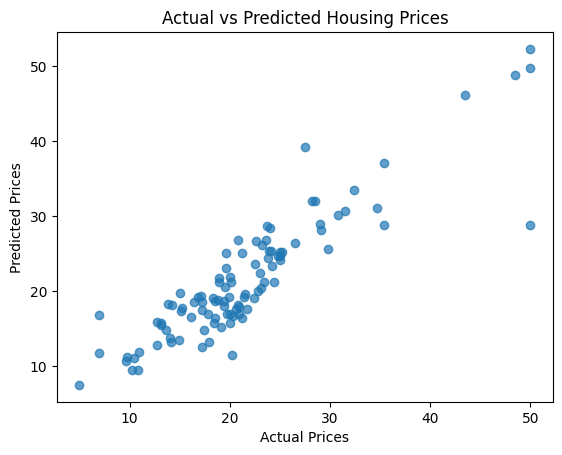

In [35]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

In [36]:
input = poly.fit_transform([[0.01632, 17.0, 2.41, 0, 0.638, 5.575, 63.2, 3.0900, 2, 290, 13.3, 380.90, 3.98]])
print(model.predict(input))

[28.13923776]
